**Import Libraries**

In [8]:
import os
import math
import string
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import streamlit as st

**Read and Import Data**

In [9]:
#care_management = r'C:/Users/secan/Documents/DataPhilly Datathon 2022/care_management_anonymized.csv'

In [10]:
#volunteer_services = r'C:/Users/secan/Documents/DataPhilly Datathon 2022/volunteer_services_anonymized.csv'
#client_info = r'C:/Users/secan/Documents/DataPhilly Datathon 2022/client_info_anonymized.csv'
#donations = r'C:/Users/secan/Documents/DataPhilly Datathon 2022/donations_anonymized.csv'
#pantry = r'C:/Users/secan/Documents/DataPhilly Datathon 2022/pantry_anonymized.csv'

In [11]:
#opens the file in read mode

care_management_data = pd.read_csv('data/care_management_anonymized.csv')                                   

In [12]:
volunteer_services_data = pd.read_csv('data/volunteer_services_anonymized.csv') #opens the file in read mode
client_info_data = pd.read_csv('data/client_info_anonymized.csv') #opens the file in read mode
donations_data = pd.read_csv('data/donations_anonymized.csv') #opens the file in read mode
pantry_data = pd.read_csv('data/pantry_anonymized.csv') #opens the file in read mode

**Client Data**

**First examine the client data**

In [13]:
client_info_data['anon_ID'].unique().sum()

205761

In [14]:
client_info_data['anon_ID'].unique().size

641

**Care Management Data**

In [15]:
care_management_data

,anon_ID,assistance_date,assistance_category,amount,unit,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3
0,531,2019-01-01 12:50:00,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,531,2019-01-02 07:30:00,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,581,2019-01-02 09:50:00,"Remote Contact with client (phone, email)",14.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,337,2019-01-02 10:10:00,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,254,2019-01-02 10:15:00,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12482,434,2021-09-13 11:40:00,Remote Contact w/o client,1.0,Minutes,Call,Client,ElderNet,ElderNet,Coordination,NaN,NaN,NaN,NaN
12483,502,2021-09-15 09:35:00,"Remote Contact with client (phone, email)",7.0,Minutes,Call,Client,Other Party,NaN,NaN,NaN,NaN,NaN,NaN
12484,30,2021-09-15 10:55:00,"Remote Contact with client (phone, email)",18.0,Minutes,Call,Client,ElderNet,Food,Coordination,NaN,NaN,NaN,NaN
12485,406,2021-09-15 14:05:00,Remote Contact w/o client,1.0,Minutes,Call,Client,ElderNet,ElderNet,Coordination,NaN,NaN,NaN,NaN


**Count the number of null values in Care Management**

In [16]:
care_management_data.isna().sum()

anon_ID                    0
assistance_date            0
assistance_category        0
amount                     0
unit                       0
CommType                7819
Party                   7812
InitiatedBy             7842
Benefit_1               8427
Assistance_1            8361
Benefit_2              11896
Assistance_2           11899
Benefit_3              12403
Assistance_3           12404
dtype: int64

**Check data shape for number of rows and columns**

In [17]:
care_management_data.shape

(12487, 14)

**Care Management Column Examination**

Check to see the list of columns in Care Management

In [18]:
care_management_data.select_dtypes(include=['object']).columns

Index(['assistance_date', 'assistance_category', 'unit', 'CommType', 'Party',
       'InitiatedBy', 'Benefit_1', 'Assistance_1', 'Benefit_2', 'Assistance_2',
       'Benefit_3', 'Assistance_3'],
      dtype='object')

**Group and Sort Columns in Care Management**

In [19]:
care_management_data_grouped_1 = care_management_data.groupby(['anon_ID','assistance_category','unit', 'CommType','Party','InitiatedBy','Benefit_1','Assistance_1','Benefit_2','Assistance_2','Benefit_3','Assistance_3'], dropna=False).sum().reset_index()
care_management_data_grouped_1

,anon_ID,assistance_category,unit,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3,amount
0,1,"Remote Contact with client (phone, email)",Minutes,Call,Client,ElderNet,NaN,Enrollment,Housing,Coordination,NaN,NaN,25.0
1,1,"Remote Contact with client (phone, email)",Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,2,Community,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,2,"Remote Contact with client (phone, email)",Minutes,Call,Client,Eldernet,Eldernet,Coordination,NaN,NaN,NaN,NaN,3.0
4,2,"Remote Contact with client (phone, email)",Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4160,640,"Remote Contact with client (phone, email)",Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
4161,641,Remote Contact w/o client,Minutes,Call,Client,ElderNet,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4162,641,Remote Contact w/o client,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
4163,641,"Remote Contact with client (phone, email)",Minutes,Call,Client,ElderNet,NaN,Coordination,NaN,NaN,NaN,NaN,8.0


**Count the number of clients by finding their unique ID's**

In [20]:
care_management_data_grouped_1['anon_ID'].unique()

array([  1,   2,   3,   5,   7,   8,  11,  12,  13,  14,  15,  16,  17,
        20,  21,  22,  23,  24,  25,  26,  27,  28,  30,  32,  33,  34,
        35,  36,  37,  38,  39,  40,  43,  44,  45,  46,  47,  50,  51,
        52,  53,  56,  57,  58,  59,  60,  61,  62,  63,  64,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  76,  77,  79,  80,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  94,  95,  97,  98,
        99, 101, 102, 103, 104, 105, 106, 107, 108, 111, 113, 114, 115,
       117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130,
       132, 134, 135, 136, 137, 139, 142, 143, 144, 145, 146, 147, 148,
       149, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163,
       164, 165, 167, 168, 169, 170, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 205, 207, 208, 210, 212, 213,
       214, 216, 218, 219, 220, 221, 222, 224, 226, 227, 228, 22

**Evaluate the data size for care management to count the number of unique elements**

In [21]:
care_management_data['anon_ID'].unique().size

490

In [22]:
care_management_data_grouped_1['anon_ID'].unique().size

490

**Examine the values of each different column in the Care Management Data**

In [23]:
care_management_data['Party'].unique()

array([nan, 'Client', 'Service Provider', 'ElderNet', 'Family', 'Other',
       'Social Worker', 'Friend', 'Eldernet', 'Care Coordinator',
       'Care Manager', 'Clinet'], dtype=object)

In [24]:
care_management_data['CommType'].unique()

array([nan, 'Text Message', 'Email', 'Voice Message', 'Call', 'Mail',
       'In Person', 'Video Call', ' '], dtype=object)

In [25]:
care_management_data['Assistance_1'].unique()

array([nan, 'Information', 'Coordination', 'Support', 'Filing',
       'Enrollment', 'Referral', 'Continuation', 'Medical',
       'coordination', 'Facilitation'], dtype=object)

In [26]:
care_management_data['Assistance_2'].unique()

array([nan, 'Coordination', 'Information', 'Referral', 'Support',
       'Enrollment', 'Continuation', 'Filing', 'ElderNet'], dtype=object)

In [27]:
care_management_data['Assistance_3'].unique()

array([nan, 'Support', 'Information', 'Coordination', 'Enrollment',
       'Referral', 'Filing', 'Continuation'], dtype=object)

In [28]:
care_management_data['Benefit_2'].unique()

array([nan, 'ADL', 'Legal', 'Food', 'Medical', 'Financial', 'Safety',
       'ElderNet', 'Housing', 'Utilities', 'Eldernet',
       'Telecommunication', 'Transportation', 'Telecommunications',
       'Social', 'Coordination'], dtype=object)

**Data Visualization and Analysis**

**Here is a bar plot showing the relationship between Communication Type(client and staff communication) and the count in minutes of attentive interaction. When it came to Calls (on phone) there was the most interaction in minutes of communication.**

In [29]:
import seaborn as sns

<AxesSubplot:xlabel='CommType', ylabel='count'>

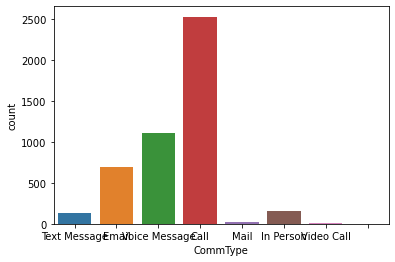

In [30]:
sns.countplot(x='CommType', data = care_management_data, linewidth=5)

**Here below examine the relationship between Assistance Category and the count in minutes of assistance. The Remote Contact with client in minutes received the most amount of time in minutes**

<AxesSubplot:xlabel='assistance_category', ylabel='count'>

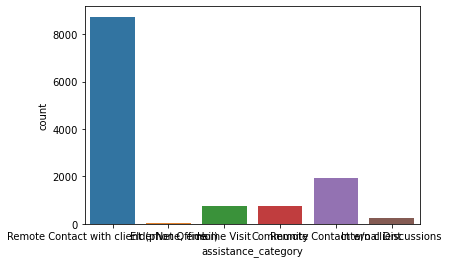

In [31]:
sns.countplot(x='assistance_category', data = care_management_data, linewidth=20)

**Here below examine the relationship between Primary Assistance and the count in minutes of assistance. The Coordination in minutes received the most amount of time**

<AxesSubplot:xlabel='Assistance_1', ylabel='count'>

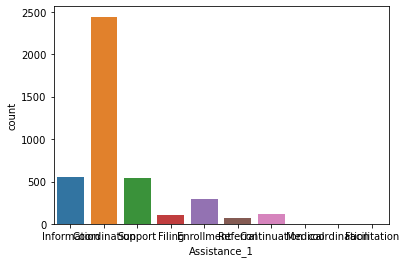

In [32]:
sns.countplot(x='Assistance_1', data = care_management_data, linewidth=15)

**Here below examine the relationship between Primary Benefit and the Count in minutes of assistance. Eldernet provided 
the most amount of time in minutes**

<AxesSubplot:xlabel='Benefit_1', ylabel='count'>

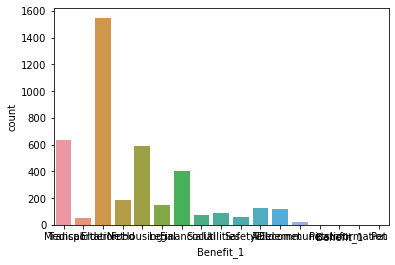

In [33]:
sns.countplot(x='Benefit_1', data = care_management_data, linewidth = 35)

**Here below examine the relationship between Secondary Assistance and the count in minutes of assistance. The Coordination in minutes received the most amount of time.**

<AxesSubplot:xlabel='Assistance_2', ylabel='count'>

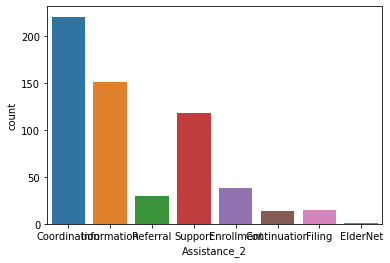

In [34]:
sns.countplot(x='Assistance_2', data = care_management_data, linewidth=15)

**Here below examine the relationship between Secondary Benefits and the count in minutes of assistance. The Eldernet assistance received the most amount of time in minutes.**

<AxesSubplot:xlabel='Benefit_2', ylabel='count'>

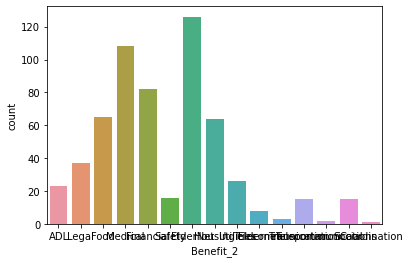

In [35]:
sns.countplot(x='Benefit_2', data = care_management_data, linewidth=40)

**Here below examine the relationship between Tertiary Benefits and the count in minutes of assistance. The Eldernet benefits in minutes received the most amount of time**

<AxesSubplot:xlabel='Benefit_3', ylabel='count'>

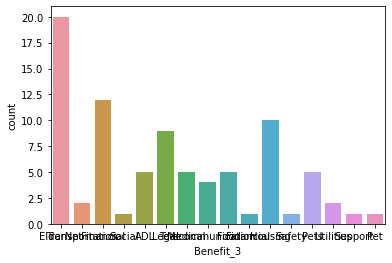

In [38]:
sns.countplot(x='Benefit_3', data = care_management_data, linewidth=35)

**Here below examine the relationship between Tertiary Assistance and the count in minutes of assistance. The Coordination in Assistance received the most amount of time**

<AxesSubplot:xlabel='Assistance_3', ylabel='count'>

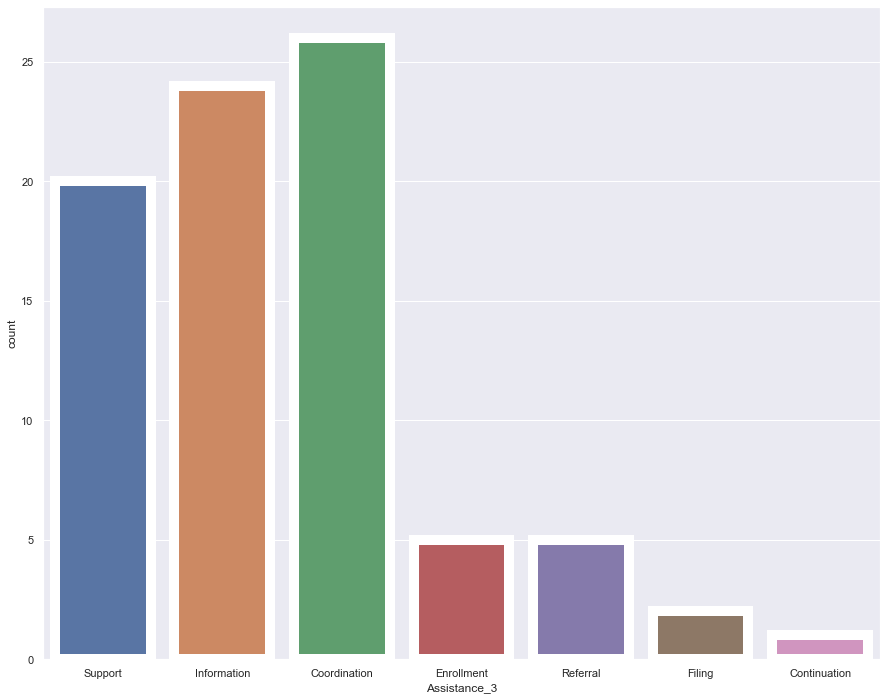

In [132]:
sns.countplot(x='Assistance_3', data = care_management_data, linewidth=10)

In [31]:
care_management_data.sort_values(by='amount', ascending = False)

,anon_ID,assistance_date,assistance_category,amount,unit,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3
2483,168,2019-06-12 13:20:00,Community,183.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2614,382,2019-06-20 08:15:00,Community,180.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6735,139,2020-02-26 09:05:00,Home Visit,170.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1396,626,2019-04-04 13:50:00,Home Visit,170.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12180,127,2021-07-19 09:20:00,Community,160.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4082,314,2019-09-27 13:25:00,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8624,168,2020-06-18 12:20:00,Remote Contact w/o client,1.0,Minutes,Voice Message,Social Worker,ElderNet,Medical,Coordination,NaN,NaN,NaN,NaN
8622,588,2020-06-18 12:10:00,Remote Contact w/o client,1.0,Minutes,Email,Family,ElderNet,NaN,NaN,NaN,NaN,NaN,NaN
8620,11,2020-06-18 12:00:00,"Remote Contact with client (phone, email)",1.0,Minutes,Call,Client,ElderNet,ElderNet,Coordination,NaN,NaN,NaN,NaN


In [32]:
#from datetime import datetime
#care_management_data['assistance_date'] = datetime.fromisoformat(care_management_data['assistance_date'])

In [33]:
care_management_data.assistance_date = pd.to_datetime(care_management_data.assistance_date, infer_datetime_format=True)  
care_management_data

,anon_ID,assistance_date,assistance_category,amount,unit,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3
0,531,2019-01-01 12:50:00,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,531,2019-01-02 07:30:00,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,581,2019-01-02 09:50:00,"Remote Contact with client (phone, email)",14.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,337,2019-01-02 10:10:00,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,254,2019-01-02 10:15:00,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12482,434,2021-09-13 11:40:00,Remote Contact w/o client,1.0,Minutes,Call,Client,ElderNet,ElderNet,Coordination,NaN,NaN,NaN,NaN
12483,502,2021-09-15 09:35:00,"Remote Contact with client (phone, email)",7.0,Minutes,Call,Client,Other Party,NaN,NaN,NaN,NaN,NaN,NaN
12484,30,2021-09-15 10:55:00,"Remote Contact with client (phone, email)",18.0,Minutes,Call,Client,ElderNet,Food,Coordination,NaN,NaN,NaN,NaN
12485,406,2021-09-15 14:05:00,Remote Contact w/o client,1.0,Minutes,Call,Client,ElderNet,ElderNet,Coordination,NaN,NaN,NaN,NaN


In [34]:
#care_management_data = care_management_data.set_index('assistance_date')

#care_management_days = care_management_data.resample('1M')

In [35]:
care_management_data['counter'] = 1
care_management_data

,anon_ID,assistance_date,assistance_category,amount,unit,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3,counter
0,531,2019-01-01 12:50:00,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,531,2019-01-02 07:30:00,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,581,2019-01-02 09:50:00,"Remote Contact with client (phone, email)",14.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,337,2019-01-02 10:10:00,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,254,2019-01-02 10:15:00,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12482,434,2021-09-13 11:40:00,Remote Contact w/o client,1.0,Minutes,Call,Client,ElderNet,ElderNet,Coordination,NaN,NaN,NaN,NaN,1
12483,502,2021-09-15 09:35:00,"Remote Contact with client (phone, email)",7.0,Minutes,Call,Client,Other Party,NaN,NaN,NaN,NaN,NaN,NaN,1
12484,30,2021-09-15 10:55:00,"Remote Contact with client (phone, email)",18.0,Minutes,Call,Client,ElderNet,Food,Coordination,NaN,NaN,NaN,NaN,1
12485,406,2021-09-15 14:05:00,Remote Contact w/o client,1.0,Minutes,Call,Client,ElderNet,ElderNet,Coordination,NaN,NaN,NaN,NaN,1


In [36]:
care_management_data.CommType

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
12482    Call
12483    Call
12484    Call
12485    Call
12486    Call
Name: CommType, Length: 12487, dtype: object

In [37]:
care_management_month = care_management_data.drop(['InitiatedBy','CommType','unit', 'Party','assistance_category'], axis=1)
care_management_month

,anon_ID,assistance_date,amount,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3,counter
0,531,2019-01-01 12:50:00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,531,2019-01-02 07:30:00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1
2,581,2019-01-02 09:50:00,14.0,NaN,NaN,NaN,NaN,NaN,NaN,1
3,337,2019-01-02 10:10:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1
4,254,2019-01-02 10:15:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
12482,434,2021-09-13 11:40:00,1.0,ElderNet,Coordination,NaN,NaN,NaN,NaN,1
12483,502,2021-09-15 09:35:00,7.0,NaN,NaN,NaN,NaN,NaN,NaN,1
12484,30,2021-09-15 10:55:00,18.0,Food,Coordination,NaN,NaN,NaN,NaN,1
12485,406,2021-09-15 14:05:00,1.0,ElderNet,Coordination,NaN,NaN,NaN,NaN,1


In [38]:
#sns.lineplot(x='assistance_date', y="counter", data=care_management_month)

In [39]:
#sns.lineplot(x='assistance_date', y="Assistance_1", data=care_management_month)

In [40]:
#sns.lineplot(x='assistance_date', y="Benefit_1", data=care_management_month)

In [41]:
#sns.lineplot(x='assistance_date', y="Assistance_2", data=care_management_month)

In [42]:
#sns.lineplot(x='assistance_date', y="Benefit_2", data=care_management_month)

In [43]:
#sns.lineplot(x='assistance_date', y="Assistance_3", data=care_management_month)

In [44]:
#sns.lineplot(x='assistance_date', y="Benefit_3", data=care_management_month)

In [45]:
care_management_data.groupby('assistance_date')

In [46]:
care_management_data = care_management_data.set_index('anon_ID')
volunteer_services_data = volunteer_services_data.set_index('anon_ID')
client_info_data = client_info_data.set_index('anon_ID')
pantry_data = pantry_data.set_index('anon_ID')

In [47]:
client_info_data

,county,poverty,minority,age_group
anon_ID,,,,
1,Montgomery,No,NaN,P
2,Montgomery,No,No,D
3,Montgomery,No,No,P
5,Montgomery,No,NaN,G
6,Montgomery,Yes,NaN,NaN
...,...,...,...,...
389,Other,NaN,Yes,NaN
602,Other,NaN,No,NaN
166,Other,NaN,No,NaN


In [48]:
care_management_data

,assistance_date,assistance_category,amount,unit,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3,counter
anon_ID,,,,,,,,,,,,,,
531,2019-01-01 12:50:00,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
531,2019-01-02 07:30:00,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
581,2019-01-02 09:50:00,"Remote Contact with client (phone, email)",14.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
337,2019-01-02 10:10:00,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
254,2019-01-02 10:15:00,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,2021-09-13 11:40:00,Remote Contact w/o client,1.0,Minutes,Call,Client,ElderNet,ElderNet,Coordination,NaN,NaN,NaN,NaN,1
502,2021-09-15 09:35:00,"Remote Contact with client (phone, email)",7.0,Minutes,Call,Client,Other Party,NaN,NaN,NaN,NaN,NaN,NaN,1
30,2021-09-15 10:55:00,"Remote Contact with client (phone, email)",18.0,Minutes,Call,Client,ElderNet,Food,Coordination,NaN,NaN,NaN,NaN,1


In [49]:
care_management_data['assistance_category'].values

array(['Remote Contact with client (phone, email)',
       'Remote Contact with client (phone, email)',
       'Remote Contact with client (phone, email)', ...,
       'Remote Contact with client (phone, email)',
       'Remote Contact w/o client',
       'Remote Contact with client (phone, email)'], dtype=object)

In [50]:
#client_data_joined = client_data_joined.join(pantry_data, on = 'anon_ID', how = 'left')
client_data_joined = client_info_data.merge(pantry_data,on = 'anon_ID', how = 'left')
client_data_joined

,county,poverty,minority,age_group,assistance_date,assistance_category,amount,unit
anon_ID,,,,,,,,
1,Montgomery,No,NaN,P,NaN,NaN,NaN,NaN
2,Montgomery,No,No,D,2/28/2019 13:15,Food Pantry: Food Pantry Poundage,25.0,Pounds
2,Montgomery,No,No,D,4/11/2019 13:15,Food Pantry: Food Pantry Poundage,25.0,Pounds
2,Montgomery,No,No,D,5/7/2019 13:15,Food Pantry: Food Pantry Poundage,25.0,Pounds
2,Montgomery,No,No,D,6/4/2019 13:15,Food Pantry: Food Pantry Poundage,25.0,Pounds
...,...,...,...,...,...,...,...,...
389,Other,NaN,Yes,NaN,NaN,NaN,NaN,NaN
602,Other,NaN,No,NaN,NaN,NaN,NaN,NaN
166,Other,NaN,No,NaN,NaN,NaN,NaN,NaN


In [51]:
client_data_joined = client_data_joined.rename({'assistance_category':'pantry_assistance_category','unit':'pantry_unit','amount':'pantry_amount',
                                               'counter':'pantry_counter'}, axis=1)
client_data_joined

,county,poverty,minority,age_group,assistance_date,pantry_assistance_category,pantry_amount,pantry_unit
anon_ID,,,,,,,,
1,Montgomery,No,NaN,P,NaN,NaN,NaN,NaN
2,Montgomery,No,No,D,2/28/2019 13:15,Food Pantry: Food Pantry Poundage,25.0,Pounds
2,Montgomery,No,No,D,4/11/2019 13:15,Food Pantry: Food Pantry Poundage,25.0,Pounds
2,Montgomery,No,No,D,5/7/2019 13:15,Food Pantry: Food Pantry Poundage,25.0,Pounds
2,Montgomery,No,No,D,6/4/2019 13:15,Food Pantry: Food Pantry Poundage,25.0,Pounds
...,...,...,...,...,...,...,...,...
389,Other,NaN,Yes,NaN,NaN,NaN,NaN,NaN
602,Other,NaN,No,NaN,NaN,NaN,NaN,NaN
166,Other,NaN,No,NaN,NaN,NaN,NaN,NaN


In [52]:
client_data_joined = client_data_joined.merge(volunteer_services_data, on = 'anon_ID', how = 'left')
client_data_joined

,county,poverty,minority,age_group,assistance_date,pantry_assistance_category,pantry_amount,pantry_unit,rider_first_ride_date,rider_last_ride_date,rider_num_rides,appt_date,appt_duration,category
anon_ID,,,,,,,,,,,,,,
1,Montgomery,No,NaN,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Montgomery,No,No,D,2/28/2019 13:15,Food Pantry: Food Pantry Poundage,25.0,Pounds,2015-11-10,2021-05-11,0.0,5/11/2021,2.0,Doctor Appt
2,Montgomery,No,No,D,2/28/2019 13:15,Food Pantry: Food Pantry Poundage,25.0,Pounds,2015-11-10,2021-05-11,0.0,5/3/2021,2.0,Doctor Appt
2,Montgomery,No,No,D,2/28/2019 13:15,Food Pantry: Food Pantry Poundage,25.0,Pounds,2015-11-10,2021-05-11,0.0,4/22/2021,2.0,Doctor Appt
2,Montgomery,No,No,D,2/28/2019 13:15,Food Pantry: Food Pantry Poundage,25.0,Pounds,2015-11-10,2021-05-11,0.0,4/21/2021,2.0,Doctor Appt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-01,2020-02-24,0.0,1/14/2019,2.0,Special Projects
81,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-01,2020-02-24,0.0,1/14/2019,2.0,Special Projects
81,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-01,2020-02-24,0.0,1/14/2019,7.0,Special Projects


In [53]:
client_data_joined = client_data_joined.rename({'category':'volunteer_category','diff_ride_days':'volunteer_diff_ride_days','appt_duration':'volunteer_appt_duration',
                                               'counter':'volunteer_counter'}, axis=1)
client_data_joined

,county,poverty,minority,age_group,assistance_date,pantry_assistance_category,pantry_amount,pantry_unit,rider_first_ride_date,rider_last_ride_date,rider_num_rides,appt_date,volunteer_appt_duration,volunteer_category
anon_ID,,,,,,,,,,,,,,
1,Montgomery,No,NaN,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Montgomery,No,No,D,2/28/2019 13:15,Food Pantry: Food Pantry Poundage,25.0,Pounds,2015-11-10,2021-05-11,0.0,5/11/2021,2.0,Doctor Appt
2,Montgomery,No,No,D,2/28/2019 13:15,Food Pantry: Food Pantry Poundage,25.0,Pounds,2015-11-10,2021-05-11,0.0,5/3/2021,2.0,Doctor Appt
2,Montgomery,No,No,D,2/28/2019 13:15,Food Pantry: Food Pantry Poundage,25.0,Pounds,2015-11-10,2021-05-11,0.0,4/22/2021,2.0,Doctor Appt
2,Montgomery,No,No,D,2/28/2019 13:15,Food Pantry: Food Pantry Poundage,25.0,Pounds,2015-11-10,2021-05-11,0.0,4/21/2021,2.0,Doctor Appt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-01,2020-02-24,0.0,1/14/2019,2.0,Special Projects
81,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-01,2020-02-24,0.0,1/14/2019,2.0,Special Projects
81,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-01,2020-02-24,0.0,1/14/2019,7.0,Special Projects


In [54]:
client_data_joined = client_data_joined.merge(care_management_data_grouped_1, on = 'anon_ID', how = 'left')
client_data_joined

,anon_ID,county,poverty,minority,age_group,assistance_date,pantry_assistance_category,pantry_amount,pantry_unit,rider_first_ride_date,...,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3,amount
0,1,Montgomery,No,NaN,P,NaN,NaN,NaN,NaN,NaN,...,Call,Client,ElderNet,NaN,Enrollment,Housing,Coordination,NaN,NaN,25.0
1,1,Montgomery,No,NaN,P,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,2,Montgomery,No,No,D,2/28/2019 13:15,Food Pantry: Food Pantry Poundage,25.0,Pounds,2015-11-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,2,Montgomery,No,No,D,2/28/2019 13:15,Food Pantry: Food Pantry Poundage,25.0,Pounds,2015-11-10,...,Call,Client,Eldernet,Eldernet,Coordination,NaN,NaN,NaN,NaN,3.0
4,2,Montgomery,No,No,D,2/28/2019 13:15,Food Pantry: Food Pantry Poundage,25.0,Pounds,2015-11-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622961,81,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2622962,81,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2622963,81,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2622964,81,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
client_data_joined = client_data_joined.rename({'assistance_category':'care_management_category','unit':'care_management_unit','CommType':'care_management_CommType',
                                               'Party':'care_management_Party','InitiatedBy':'care_management_InitiatedBy','Benefit_1':'care_management_Benefit_1',
                                                'Assistance_1':'care_management_Assistance_1',
                                               'Benefit_2':'care_management_Benefit_2','Assistance_2':'care_management_Assistance_2','Benefit_3':'care_management_Benefit_3',
                                               'Assistance_3':'care_management_Assistance_3','amount':'care_management_amount','counter':'care_management_counter'}, axis=1)
client_data_joined

,anon_ID,county,poverty,minority,age_group,assistance_date,pantry_assistance_category,pantry_amount,pantry_unit,rider_first_ride_date,...,care_management_CommType,care_management_Party,care_management_InitiatedBy,care_management_Benefit_1,care_management_Assistance_1,care_management_Benefit_2,care_management_Assistance_2,care_management_Benefit_3,care_management_Assistance_3,care_management_amount
0,1,Montgomery,No,NaN,P,NaN,NaN,NaN,NaN,NaN,...,Call,Client,ElderNet,NaN,Enrollment,Housing,Coordination,NaN,NaN,25.0
1,1,Montgomery,No,NaN,P,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,2,Montgomery,No,No,D,2/28/2019 13:15,Food Pantry: Food Pantry Poundage,25.0,Pounds,2015-11-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,2,Montgomery,No,No,D,2/28/2019 13:15,Food Pantry: Food Pantry Poundage,25.0,Pounds,2015-11-10,...,Call,Client,Eldernet,Eldernet,Coordination,NaN,NaN,NaN,NaN,3.0
4,2,Montgomery,No,No,D,2/28/2019 13:15,Food Pantry: Food Pantry Poundage,25.0,Pounds,2015-11-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622961,81,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2622962,81,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2622963,81,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2622964,81,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
client_data_joined.columns

Index(['anon_ID', 'county', 'poverty', 'minority', 'age_group',
       'assistance_date', 'pantry_assistance_category', 'pantry_amount',
       'pantry_unit', 'rider_first_ride_date', 'rider_last_ride_date',
       'rider_num_rides', 'appt_date', 'volunteer_appt_duration',
       'volunteer_category', 'care_management_category',
       'care_management_unit', 'care_management_CommType',
       'care_management_Party', 'care_management_InitiatedBy',
       'care_management_Benefit_1', 'care_management_Assistance_1',
       'care_management_Benefit_2', 'care_management_Assistance_2',
       'care_management_Benefit_3', 'care_management_Assistance_3',
       'care_management_amount'],
      dtype='object')

In [58]:
client_data_joined['care_management_counter'].sort_values(ascending=False)

KeyError: 'care_management_counter'

In [61]:
client_data_joined

,anon_ID,county,poverty,minority,age_group,assistance_date,pantry_assistance_category,pantry_amount,pantry_unit,rider_first_ride_date,...,care_management_CommType,care_management_Party,care_management_InitiatedBy,care_management_Benefit_1,care_management_Assistance_1,care_management_Benefit_2,care_management_Assistance_2,care_management_Benefit_3,care_management_Assistance_3,care_management_amount
0,1,Montgomery,No,NaN,P,NaN,NaN,NaN,NaN,NaN,...,Call,Client,ElderNet,NaN,Enrollment,Housing,Coordination,NaN,NaN,25.0
1,1,Montgomery,No,NaN,P,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,2,Montgomery,No,No,D,2/28/2019 13:15,Food Pantry: Food Pantry Poundage,25.0,Pounds,2015-11-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,2,Montgomery,No,No,D,2/28/2019 13:15,Food Pantry: Food Pantry Poundage,25.0,Pounds,2015-11-10,...,Call,Client,Eldernet,Eldernet,Coordination,NaN,NaN,NaN,NaN,3.0
4,2,Montgomery,No,No,D,2/28/2019 13:15,Food Pantry: Food Pantry Poundage,25.0,Pounds,2015-11-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622961,81,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2622962,81,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2622963,81,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2622964,81,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
client_data_joined.groupby('unit_y').sum()

KeyError: 'unit_y'

In [63]:
client_data_joined.isna().sum()

anon_ID                               0
county                                0
poverty                            1463
minority                          64958
age_group                          2964
assistance_date                    8465
pantry_assistance_category         8465
pantry_amount                      8465
pantry_unit                        8465
rider_first_ride_date             36205
rider_last_ride_date              36205
rider_num_rides                   36205
appt_date                         36205
volunteer_appt_duration           36205
volunteer_category                36205
care_management_category           2760
care_management_unit               2760
care_management_CommType         291731
care_management_Party            280159
care_management_InitiatedBy      294528
care_management_Benefit_1        508405
care_management_Assistance_1     510103
care_management_Benefit_2       2177660
care_management_Assistance_2    2179606
care_management_Benefit_3       2569087


In [62]:
pantry_data

,assistance_date,assistance_category,amount,unit
anon_ID,,,,
102,1/3/2019 10:00,Food Pantry: Food Pantry Poundage,25,Pounds
178,1/3/2019 10:00,Food Pantry: Food Pantry Poundage,25,Pounds
588,1/3/2019 10:30,Food Pantry: Food Pantry Poundage,25,Pounds
502,1/3/2019 11:15,Food Pantry: Food Pantry Poundage,25,Pounds
232,1/3/2019 11:30,Food Pantry: Food Pantry Poundage,25,Pounds
...,...,...,...,...
611,9/7/2021 14:15,Food Pantry: Food Pantry Poundage,25,Pounds
516,9/7/2021 14:55,Food Pantry: Food Pantry Poundage,25,Pounds
274,9/7/2021 15:00,Food Pantry: Food Pantry Poundage,25,Pounds


In [64]:
volunteer_services_data

,rider_first_ride_date,rider_last_ride_date,rider_num_rides,appt_date,appt_duration,category
anon_ID,,,,,,
276,2015-04-27,2021-11-16,0,9/15/2021,2.00,Doctor Appt
276,2015-04-27,2021-11-16,0,9/1/2021,2.00,Doctor Appt
276,2015-04-27,2021-11-16,0,8/26/2021,2.00,Doctor Appt
276,2015-04-27,2021-11-16,0,8/11/2021,2.00,Doctor Appt
276,2015-04-27,2021-11-16,0,8/10/2021,2.25,Doctor Appt
...,...,...,...,...,...,...
81,2015-05-01,2020-02-24,0,1/14/2019,2.00,Special Projects
81,2015-05-01,2020-02-24,0,1/14/2019,2.00,Special Projects
81,2015-05-01,2020-02-24,0,1/14/2019,7.00,Special Projects


In [65]:
from datetime import datetime

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

In [66]:
volunteer_services_data['rider_first_ride_date'] = pd.to_datetime(volunteer_services_data['rider_first_ride_date'], infer_datetime_format=True)
volunteer_services_data['rider_last_ride_date'] = pd.to_datetime(volunteer_services_data['rider_last_ride_date'], infer_datetime_format=True)  

In [67]:
volunteer_services_data['diff_ride_days'] = abs(volunteer_services_data['rider_first_ride_date'] - volunteer_services_data['rider_last_ride_date'])

In [68]:
volunteer_services_data.groupby(['anon_ID','diff_ride_days']).count()

,,rider_first_ride_date,rider_last_ride_date,rider_num_rides,appt_date,appt_duration,category
anon_ID,diff_ride_days,,,,,,
2,2009 days,28,28,28,28,28,28
3,378 days,6,6,6,6,6,6
4,462 days,34,34,34,34,34,34
7,1215 days,14,14,14,14,14,14
8,2361 days,86,86,86,86,86,86
...,...,...,...,...,...,...,...
630,494 days,17,17,17,17,17,17
631,1795 days,24,24,24,24,24,24
634,1409 days,2,2,2,2,2,2


In [69]:
volunteer_services_data['category'].unique()

array(['Doctor Appt', 'Errands', 'Shopping', 'Friendly Visit',
       'Skilled Work', 'Telephone Reassurance', 'Odd Jobs', 'Yard Work',
       'Pantry Delivery', 'Special Projects', 'Pantry',
       'Board or Committee Mtg'], dtype=object)

In [70]:
volunteer_services_data['counter'] = 1

In [71]:

volunteer_services_data_grouped = volunteer_services_data.groupby(['anon_ID','category','diff_ride_days']).sum()
volunteer_services_data_grouped = volunteer_services_data_grouped.reset_index()
volunteer_services_data_grouped

,anon_ID,category,diff_ride_days,rider_num_rides,appt_duration,counter
0,2,Doctor Appt,2009 days,0,54.25,28
1,3,Doctor Appt,378 days,0,12.00,6
2,4,Doctor Appt,462 days,0,47.50,23
3,4,Friendly Visit,462 days,0,41.00,11
4,7,Doctor Appt,1215 days,0,27.75,14
...,...,...,...,...,...,...
302,638,Skilled Work,1861 days,0,565.50,18
303,641,Doctor Appt,1426 days,0,2.00,1
304,641,Friendly Visit,1426 days,0,1.50,2
305,641,Odd Jobs,1426 days,0,4.00,2


In [72]:
volunteer_services_data.groupby(['anon_ID']).sum()

,rider_num_rides,appt_duration,counter
anon_ID,,,
2,0,54.25,28
3,0,12.00,6
4,0,88.50,34
7,0,27.75,14
8,0,170.75,86
...,...,...,...
630,0,71.00,17
631,0,91.50,24
634,0,11.00,2


In [73]:
volunteer_services_data.describe()

,rider_num_rides,appt_duration,diff_ride_days,counter
count,4925.0,4925.000000,4925,4925.0
mean,0.0,3.165279,1762 days 05:56:42.639593920,1.0
std,0.0,5.648763,677 days 19:48:39.272689768,0.0
min,0.0,0.000000,0 days 00:00:00,1.0
25%,0.0,2.000000,1309 days 00:00:00,1.0
50%,0.0,2.000000,2100 days 00:00:00,1.0
75%,0.0,3.000000,2313 days 00:00:00,1.0
max,0.0,200.000000,2425 days 00:00:00,1.0


In [74]:
volunteer_services_data.groupby('category').mean()

,rider_num_rides,appt_duration,counter
category,,,
Board or Committee Mtg,0.0,2.308874,1.0
Doctor Appt,0.0,2.077426,1.0
Errands,0.0,1.863924,1.0
Friendly Visit,0.0,3.653678,1.0
Odd Jobs,0.0,4.662791,1.0
Pantry,0.0,9.078755,1.0
Pantry Delivery,0.0,5.216667,1.0
Shopping,0.0,2.916019,1.0
Skilled Work,0.0,28.425000,1.0


In [75]:
volunteer_services_data.groupby('category').sum()

,rider_num_rides,appt_duration,counter
category,,,
Board or Committee Mtg,0,1353.00,586
Doctor Appt,0,4366.75,2102
Errands,0,147.25,79
Friendly Visit,0,2086.25,571
Odd Jobs,0,200.50,43
Pantry,0,2478.50,273
Pantry Delivery,0,156.50,30
Shopping,0,3376.75,1158
Skilled Work,0,568.50,20


<AxesSubplot:xlabel='category', ylabel='count'>

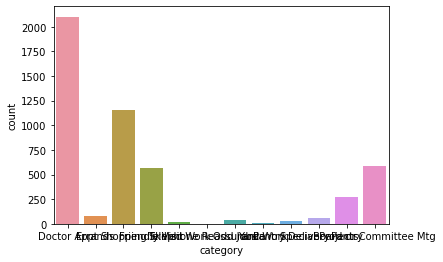

In [82]:
sns.countplot(x='category', data = volunteer_services_data, linewidth=45)

In [83]:
volunteer_services_data['rider_num_rides'].values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
volunteer_services_data

,rider_first_ride_date,rider_last_ride_date,rider_num_rides,appt_date,appt_duration,category,diff_ride_days,counter
anon_ID,,,,,,,,
276,2015-04-27,2021-11-16,0,9/15/2021,2.00,Doctor Appt,2395 days,1
276,2015-04-27,2021-11-16,0,9/1/2021,2.00,Doctor Appt,2395 days,1
276,2015-04-27,2021-11-16,0,8/26/2021,2.00,Doctor Appt,2395 days,1
276,2015-04-27,2021-11-16,0,8/11/2021,2.00,Doctor Appt,2395 days,1
276,2015-04-27,2021-11-16,0,8/10/2021,2.25,Doctor Appt,2395 days,1
...,...,...,...,...,...,...,...,...
81,2015-05-01,2020-02-24,0,1/14/2019,2.00,Special Projects,1760 days,1
81,2015-05-01,2020-02-24,0,1/14/2019,2.00,Special Projects,1760 days,1
81,2015-05-01,2020-02-24,0,1/14/2019,7.00,Special Projects,1760 days,1


In [85]:
client_info_data

,county,poverty,minority,age_group
anon_ID,,,,
1,Montgomery,No,NaN,P
2,Montgomery,No,No,D
3,Montgomery,No,No,P
5,Montgomery,No,NaN,G
6,Montgomery,Yes,NaN,NaN
...,...,...,...,...
389,Other,NaN,Yes,NaN
602,Other,NaN,No,NaN
166,Other,NaN,No,NaN


In [86]:
donations_data

,anon_donor_id,zip,status,do_not_mail,do_not_call,organisation,date,amount,form,campaign,target
0,92,19003.0,Active,False,False,N,01/01/2019,40.0,Check,Clients,Gift
1,321,19096.0,Active,False,False,N,01/02/2019,25.0,Check,Fall Towns,Gift
2,559,19146.0,Active,False,False,N,01/02/2019,250.0,Check,Fall Towns,Gift
3,926,19041.0,Active,False,False,N,01/03/2019,50.0,Check,Fall Towns,Gift
4,860,10038.0,Active,False,False,N,01/04/2019,165.0,Check,Misc,Gift
...,...,...,...,...,...,...,...,...,...,...,...
2185,330,19103.0,Active,False,False,N,09/02/2021,150.0,Check,Misc,Gift
2186,197,19073.0,Active,False,False,N,09/05/2021,200.0,Check,Misc,Gift
2187,592,19003.0,Active,False,False,N,09/14/2021,75.0,Check,Sprg Evt,Gift
2188,835,19072.0,Active,False,False,N,09/14/2021,20.0,Check,Board,Gift


In [89]:
donations_data['campaign'].value_counts()

Fall Towns    874
Sprg Evt      645
Misc          199
Emerg fund    130
Clients        69
Foundation     59
Board          41
Mem-hon        40
Church         29
Corporatio     22
Newsletter     22
CAC            20
Escort Dri     19
Special Pr      9
D.Young Fu      3
United Way      3
AMCRC           2
Grants          2
In-Kind         1
In/Out          1
Name: campaign, dtype: int64

In [90]:
donations_data.groupby('campaign').sum()

,anon_donor_id,zip,do_not_mail,do_not_call,amount
campaign,,,,,
AMCRC,792,38020.0,0,0,16500.00
Board,25053,781036.0,0,0,12360.00
CAC,13123,383349.0,0,0,5775.00
Church,17833,552559.0,0,0,64510.00
Clients,20996,1262406.0,0,0,2959.00
Corporatio,12046,328284.0,0,0,43853.10
D.Young Fu,2478,57288.0,0,0,468.00
Emerg fund,76159,2306166.0,1,1,133508.81
Escort Dri,3367,361058.0,0,0,10187.50


In [91]:
donations_data.groupby('campaign').mean()

,anon_donor_id,zip,do_not_mail,do_not_call,amount
campaign,,,,,
AMCRC,396.000000,19010.000000,0.000000,0.000000,8250.000000
Board,611.048780,19049.658537,0.000000,0.000000,301.463415
CAC,656.150000,19167.450000,0.000000,0.000000,288.750000
Church,614.931034,19053.758621,0.000000,0.000000,2224.482759
Clients,304.289855,18841.880597,0.000000,0.000000,42.884058
Corporatio,547.545455,23448.857143,0.000000,0.000000,1993.322727
D.Young Fu,826.000000,19096.000000,0.000000,0.000000,156.000000
Emerg fund,585.838462,19059.223140,0.007692,0.007692,1026.990846
Escort Dri,177.210526,19003.052632,0.000000,0.000000,536.184211


In [50]:
top_5_zip = donations_data.groupby('campaign').mean().head(5)
top_5_zip

,anon_donor_id,zip,do_not_mail,do_not_call,amount
campaign,,,,,
AMCRC,396.000000,19010.000000,0.0,0.0,8250.000000
Board,611.048780,19049.658537,0.0,0.0,301.463415
CAC,656.150000,19167.450000,0.0,0.0,288.750000
Church,614.931034,19053.758621,0.0,0.0,2224.482759
Clients,304.289855,18841.880597,0.0,0.0,42.884058


**These are the top 5 zip codes for donors**

<AxesSubplot:xlabel='zip', ylabel='count'>

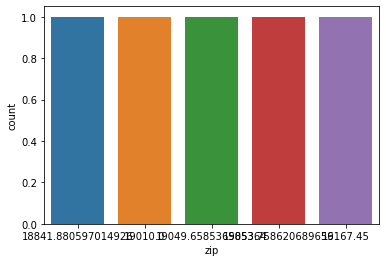

In [54]:
sns.countplot(x='zip', data = top_5_zip, linewidth=50)

**These are the top 5 amounts for donations**

<AxesSubplot:xlabel='amount', ylabel='count'>

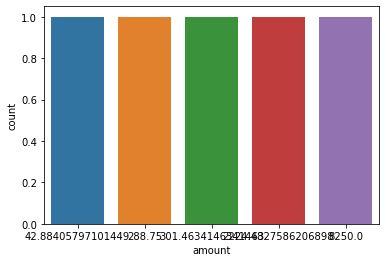

In [55]:
sns.countplot(x='amount', data = top_5_zip, linewidth=50)

In [92]:
organization_donations = donations_data.loc[donations_data['organisation'] == 'Y'].sort_values(by='amount', ascending = False)
organization_donations

,anon_donor_id,zip,status,do_not_mail,do_not_call,organisation,date,amount,form,campaign,target
1877,135,19003.0,Active,False,False,Y,04/09/2021,22814.3,Check,Special Pr,Gift
1827,135,19003.0,Active,False,False,Y,02/12/2021,22054.7,Check,Emerg fund,Gift
152,135,19003.0,Active,False,False,Y,04/12/2019,20000.0,Check,Foundation,Gift
1009,135,19003.0,Active,False,False,Y,04/16/2020,20000.0,Check,Grants,Gift
1887,135,19003.0,Active,False,False,Y,04/16/2021,20000.0,Check,Grants,Gift
...,...,...,...,...,...,...,...,...,...,...,...
375,743,NaN,Active,False,False,Y,09/05/2019,2.0,Check,Misc,Gift
256,743,NaN,Active,False,False,Y,05/06/2019,2.0,Check,Fall Towns,Gift
324,743,NaN,Active,False,False,Y,07/19/2019,2.0,Check,Misc,Gift
209,743,NaN,Active,False,False,Y,04/29/2019,2.0,Check,Fall Towns,Gift


In [93]:
organization_donations['anon_donor_id'].value_counts()

135     32
743     24
1028    11
815      6
242      4
359      4
515      3
850      2
1038     2
925      2
165      2
209      2
36       2
505      2
789      1
922      1
836      1
528      1
429      1
696      1
195      1
444      1
596      1
332      1
66       1
625      1
667      1
350      1
682      1
817      1
Name: anon_donor_id, dtype: int64

In [94]:
donations_data.groupby('zip').sum().sort_values(by='amount', ascending=False)

,anon_donor_id,do_not_mail,do_not_call,amount
zip,,,,
19010.0,153167,3,3,195993.17
19003.0,73284,3,3,165139.50
19101.0,456,0,0,100000.00
19096.0,223352,6,3,75974.00
19428.0,1001,0,0,60000.00
...,...,...,...,...
22827.0,44,0,0,18.00
19044.0,90,0,0,10.00
8077.0,416,0,0,10.00


In [95]:
donations_data.groupby('zip').mean().head().sort_values(by='amount', ascending=False)

,anon_donor_id,do_not_mail,do_not_call,amount
zip,,,,
19101.0,152.00,0.0,0.0,33333.333333
19428.0,250.25,0.0,0.0,15000.000000
19107.0,378.00,0.0,0.0,9124.000000
18103.0,86.00,0.0,0.0,6666.666667
19401.0,501.00,0.0,0.0,6200.000000
...,...,...,...,...
7094.0,1008.00,0.0,0.0,15.000000
8077.0,416.00,0.0,0.0,10.000000
19044.0,90.00,0.0,0.0,10.000000


In [58]:
sns.countplot(x='zip', data = donations_data.groupby('zip').mean().head().sort_values(by='amount', ascending=False), linewidth=50)

ValueError: Could not interpret input 'zip'

In [ ]:
count_plots(care_management_data)

In [87]:
pantry_data

,assistance_date,assistance_category,amount,unit
anon_ID,,,,
102,1/3/2019 10:00,Food Pantry: Food Pantry Poundage,25,Pounds
178,1/3/2019 10:00,Food Pantry: Food Pantry Poundage,25,Pounds
588,1/3/2019 10:30,Food Pantry: Food Pantry Poundage,25,Pounds
502,1/3/2019 11:15,Food Pantry: Food Pantry Poundage,25,Pounds
232,1/3/2019 11:30,Food Pantry: Food Pantry Poundage,25,Pounds
...,...,...,...,...
611,9/7/2021 14:15,Food Pantry: Food Pantry Poundage,25,Pounds
516,9/7/2021 14:55,Food Pantry: Food Pantry Poundage,25,Pounds
274,9/7/2021 15:00,Food Pantry: Food Pantry Poundage,25,Pounds


In [107]:
pantry_data['counter'] = 1

In [135]:
pantry_data_grouped = pantry_data.groupby(['anon_ID','assistance_category','unit']).sum().reset_index()

In [136]:
pantry_data_grouped

,anon_ID,assistance_category,unit,amount,counter
0,2,Food Pantry: Food Pantry Poundage,Pounds,675,27
1,2,Food Pantry: Holiday Baskets,Dollars,25,1
2,2,Food Pantry: Holiday Baskets,Pounds,90,3
3,5,Food Pantry: Food Pantry Poundage,Pounds,1225,49
4,6,Food Pantry: Food Pantry Poundage,Pounds,75,3
...,...,...,...,...,...
652,635,Food Pantry: Food Pantry Poundage,Pounds,1225,49
653,635,Food Pantry: Holiday Baskets,Pounds,60,2
654,636,Food Pantry: Food Pantry Poundage,Pounds,25,1
655,639,Food Pantry: Holiday Baskets,Dollars,75,1


**Within the pantry the clients received many pounds of food**

<AxesSubplot:xlabel='unit', ylabel='count'>

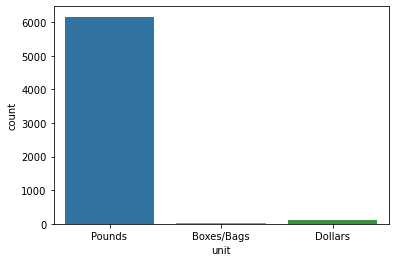

In [100]:
sns.countplot(x='unit',data = pantry_data)

In [ ]:
sns.countplot(x='assistance_category',data = pantry_data, linewidth=5)

In [104]:
pantry_data.groupby(['anon_ID','assistance_category']).sum()

amount  counter
anon_ID assistance_category                               
2       Food Pantry: Food Pantry Poundage     675       27
        Food Pantry: Holiday Baskets          115        4
5       Food Pantry: Food Pantry Poundage    1225       49
6       Food Pantry: Food Pantry Poundage      75        3
8       Food Pantry: Food Pantry Poundage     825       33
...                                           ...      ...
634     Food Pantry: Holiday Baskets          140        4
635     Food Pantry: Food Pantry Poundage    1225       49
        Food Pantry: Holiday Baskets           60        2
636     Food Pantry: Food Pantry Poundage      25        1
639     Food Pantry: Holiday Baskets          195        5

[592 rows x 2 columns]

In [103]:
pantry_data.groupby('unit').sum()

,amount,counter
unit,,
Boxes/Bags,49,13
Dollars,3045,99
Pounds,155605,6161


In [108]:
def count_plots(df):
    for col in df:
        fig = plt.figure(figsize =(10, 7))
 
        # Horizontal Bar Plot

        sns.set_theme(style="darkgrid")
        ax = sns.countplot(x=col, data=df)
        sns.set(rc={'figure.figsize':(15,12)})
        # Show Plot
        plt.show()

In [ ]:
import seaborn as sns

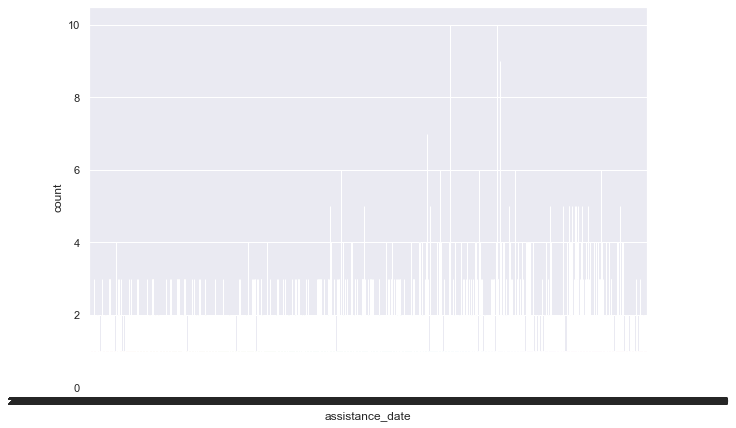

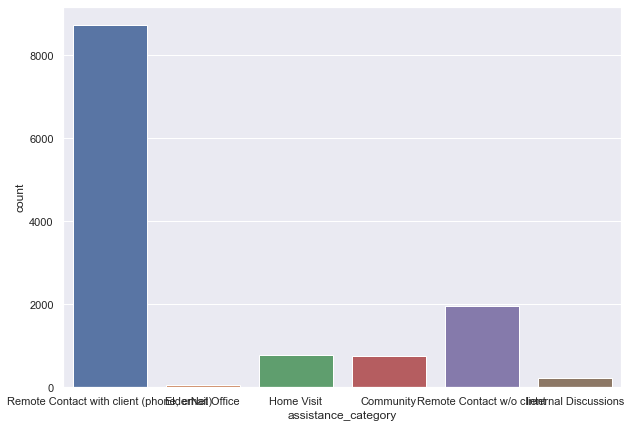

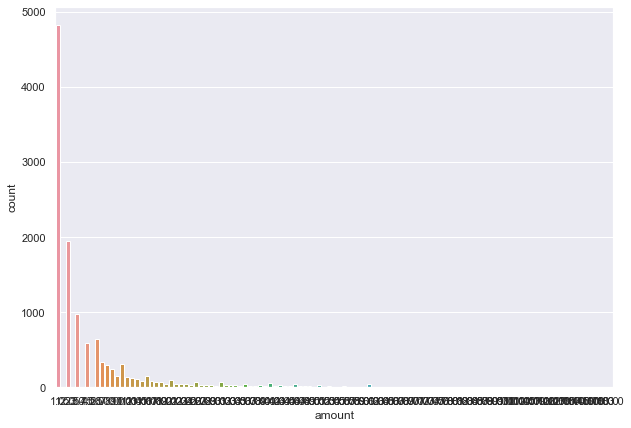

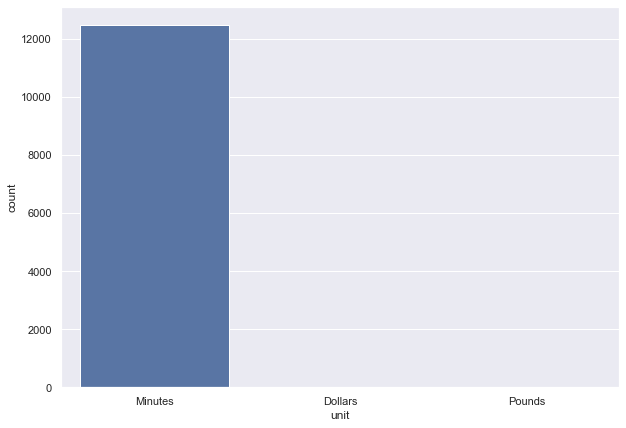

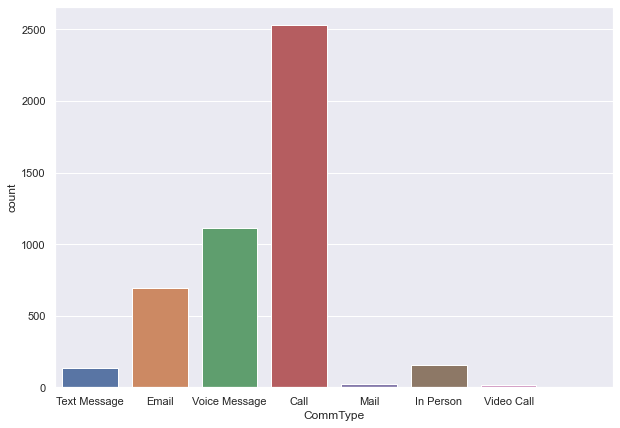

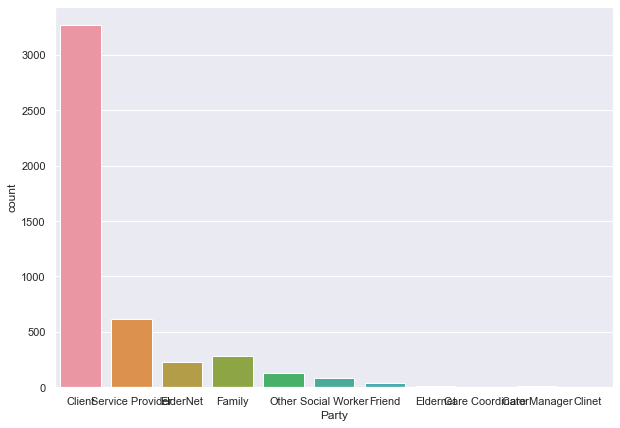

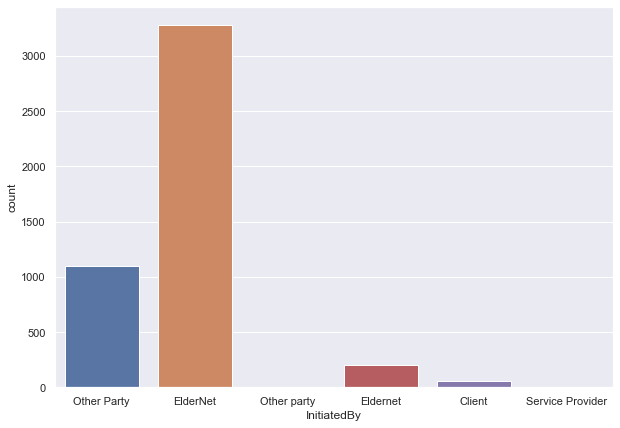

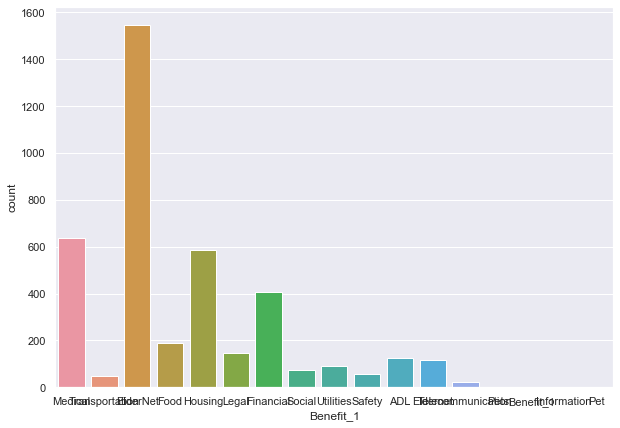

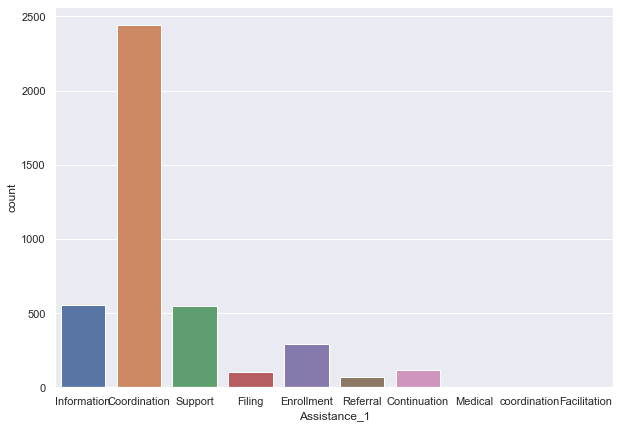

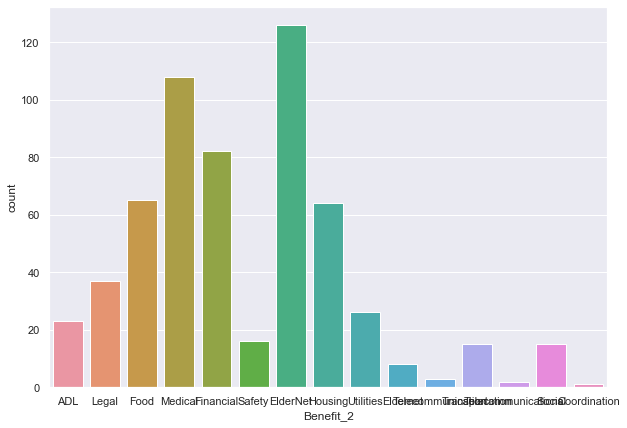

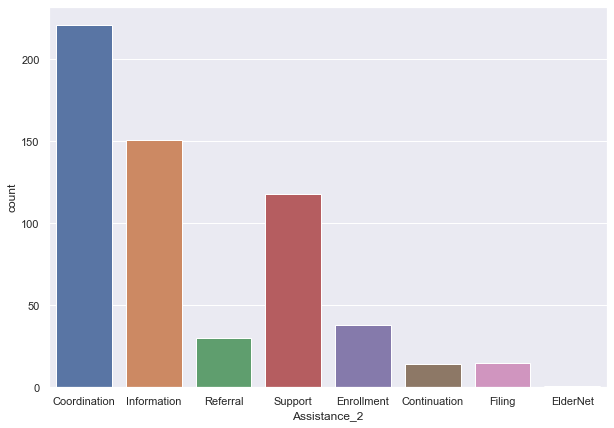

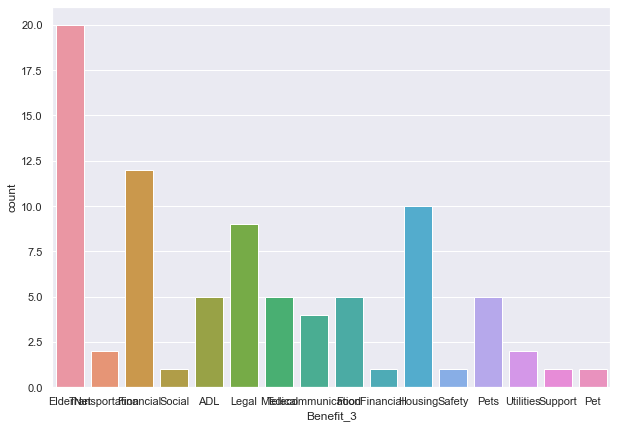

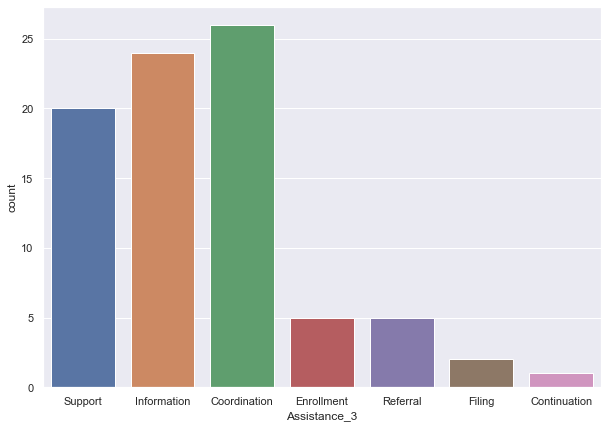

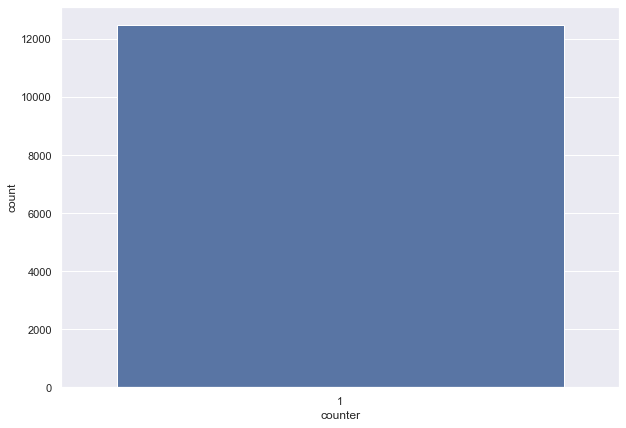

In [110]:
count_plots(care_management_data)

**Most clients are from Montgomery County, are in poverty, non-minority, and in age group G**

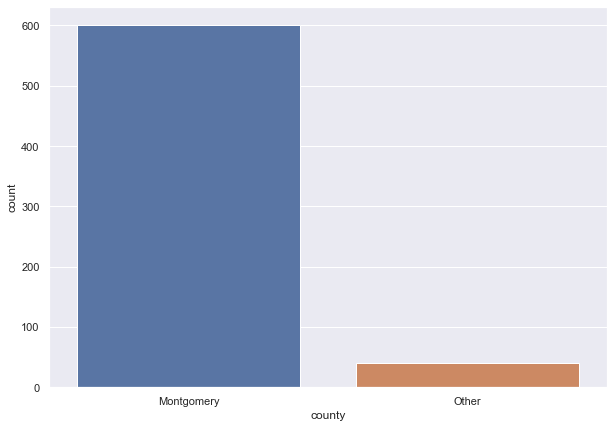

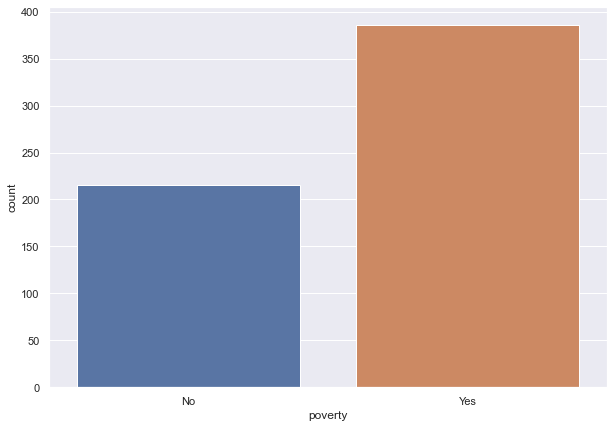

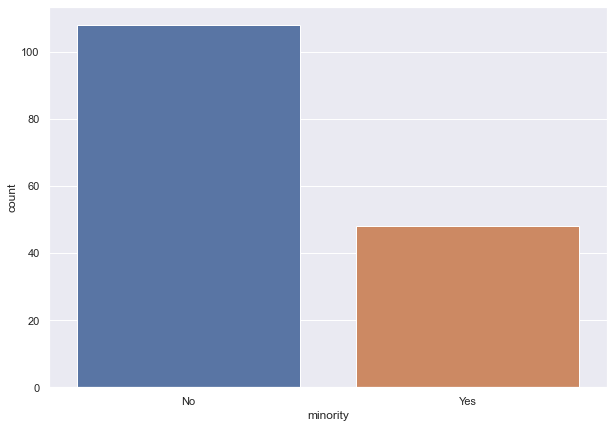

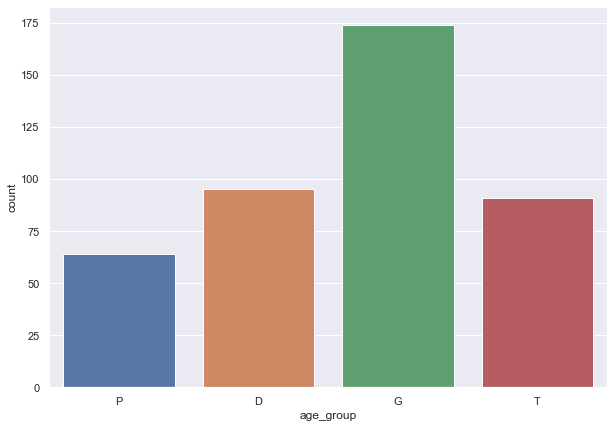

In [113]:
count_plots(client_info_data)

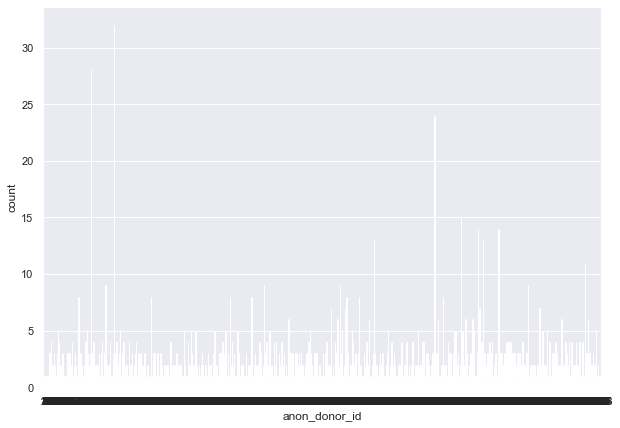

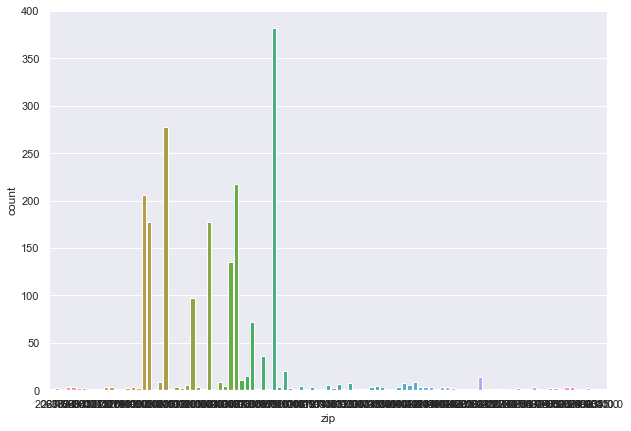

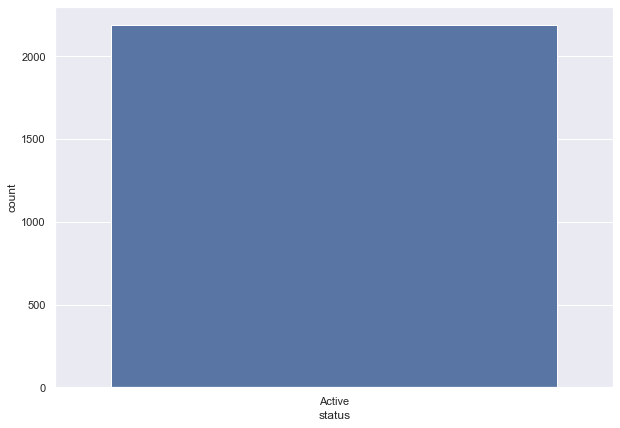

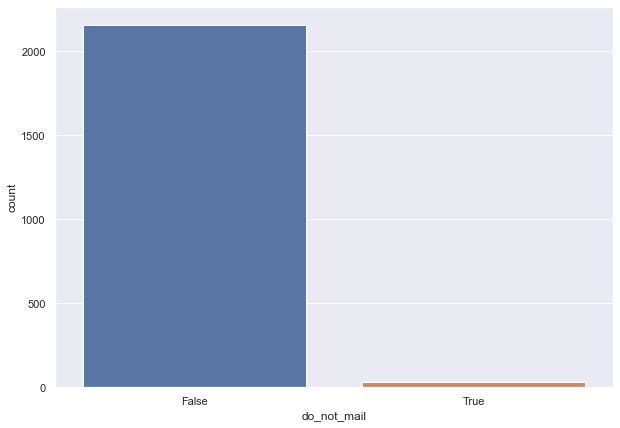

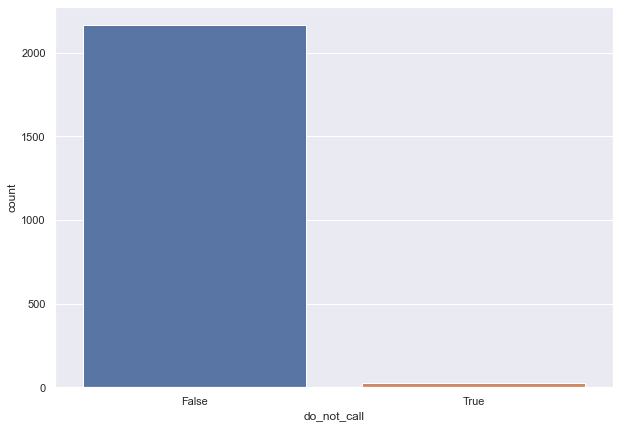

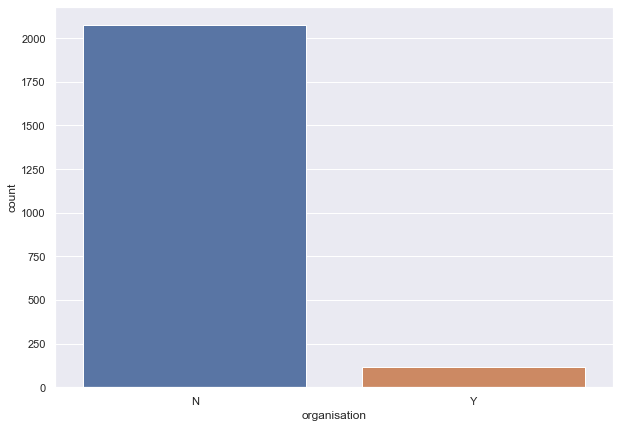

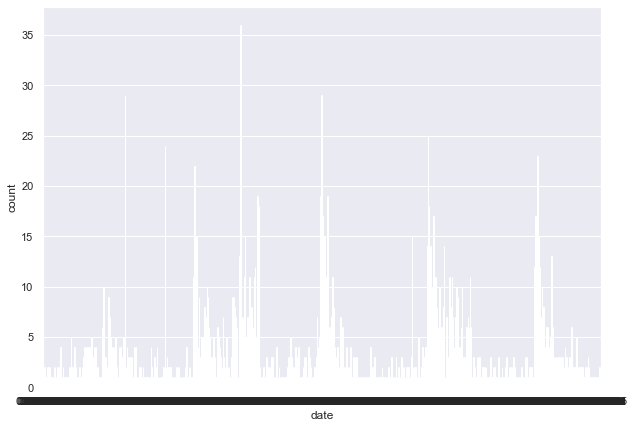

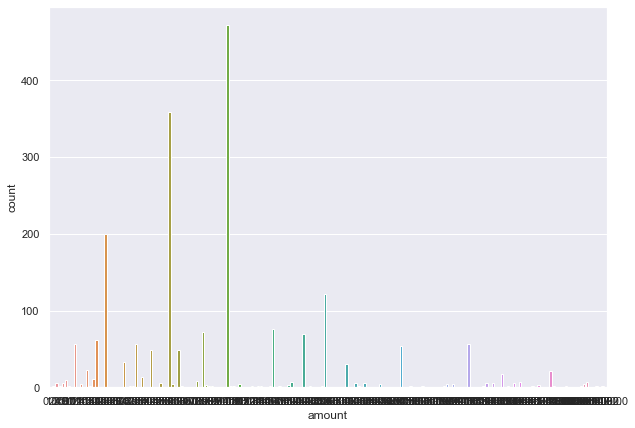

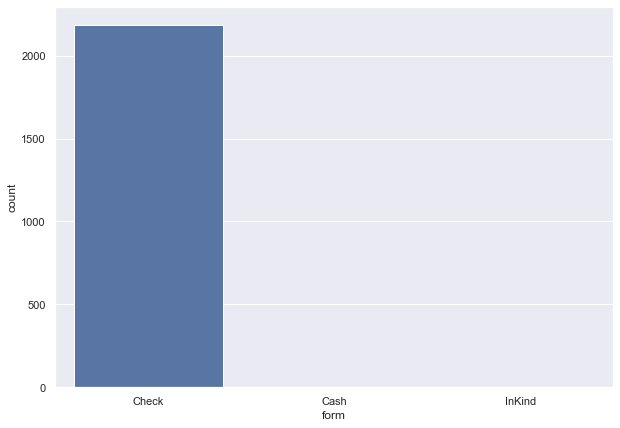

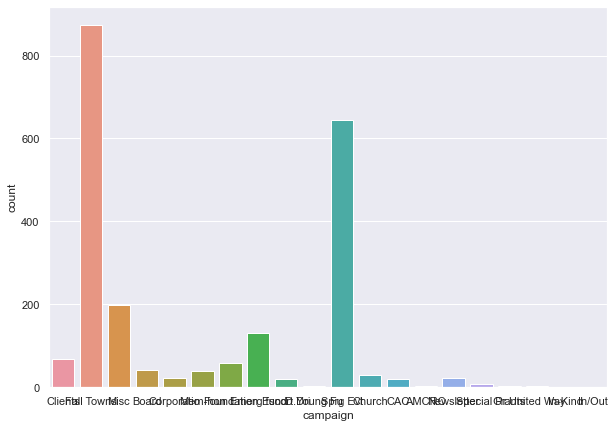

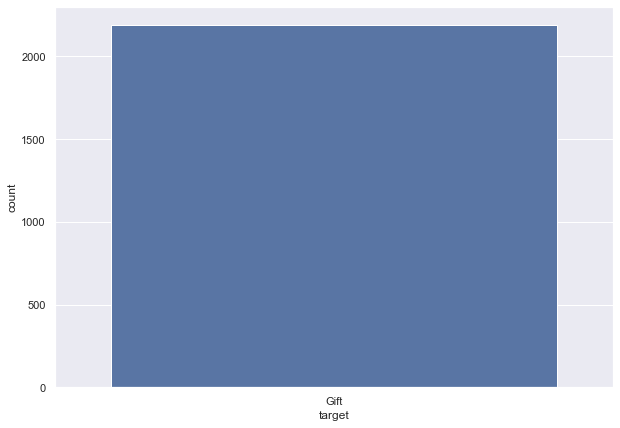

In [112]:
count_plots(donations_data)

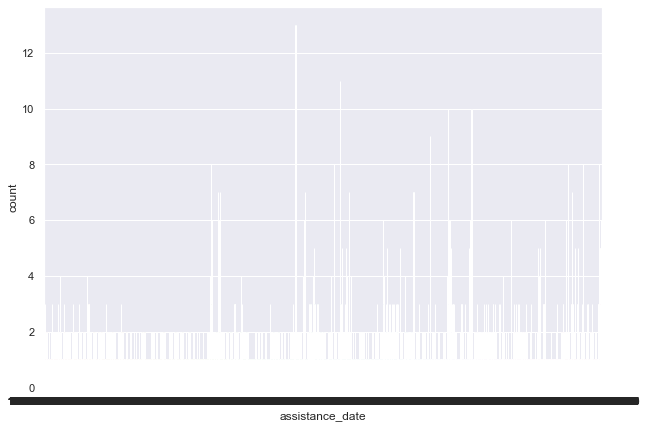

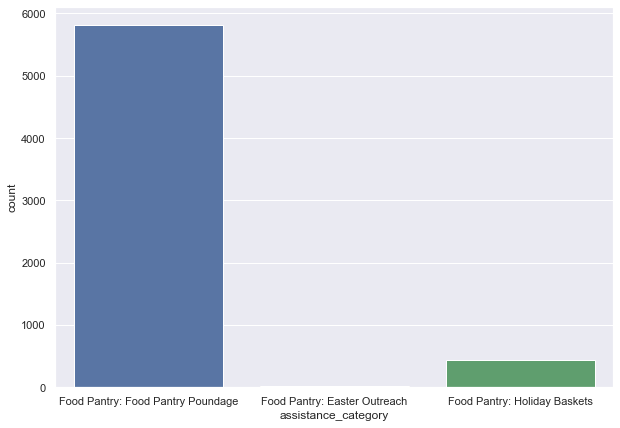

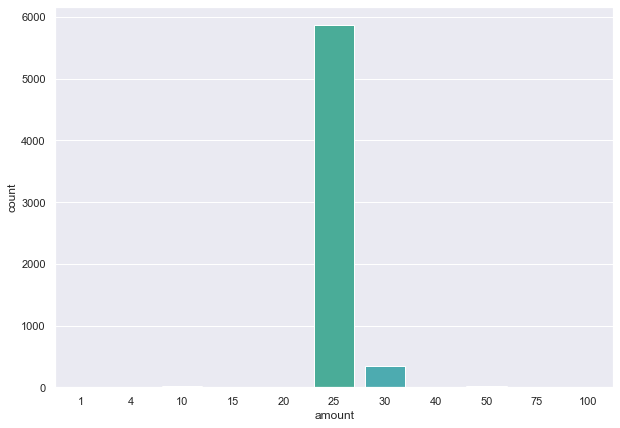

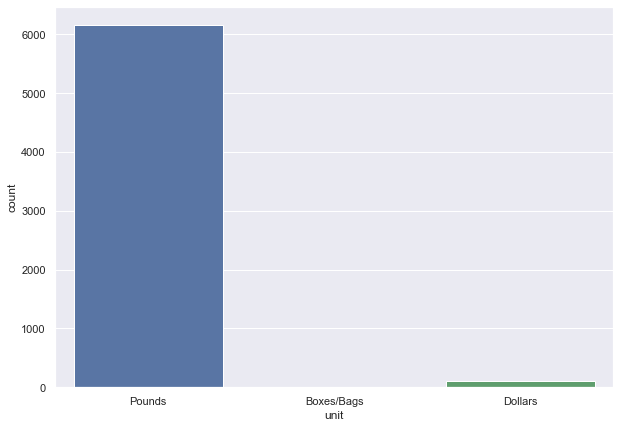

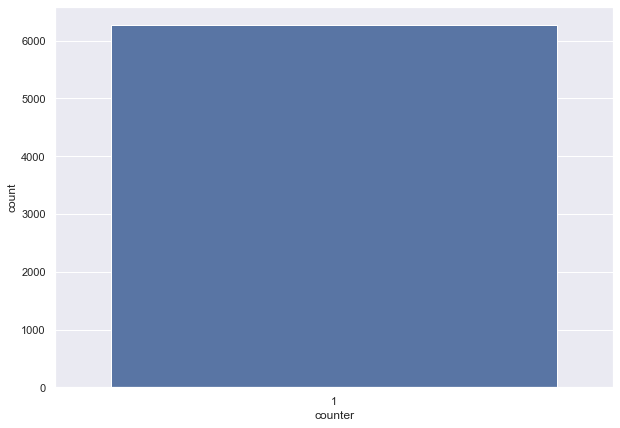

In [114]:
count_plots(pantry_data)

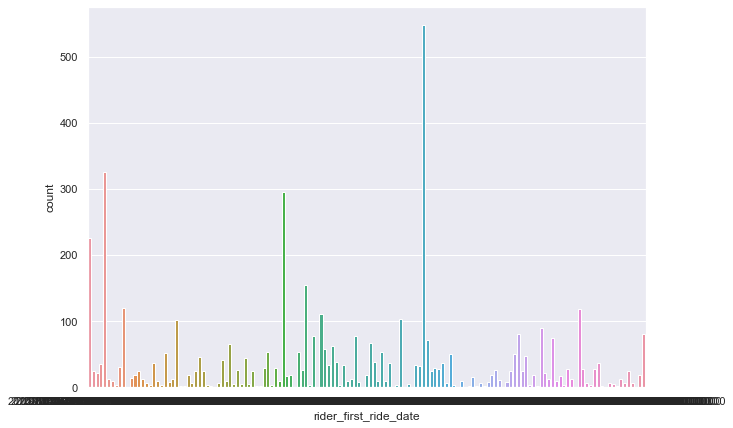

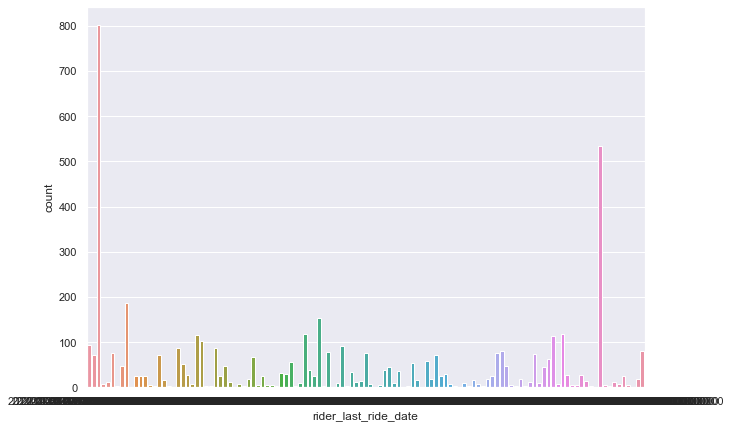

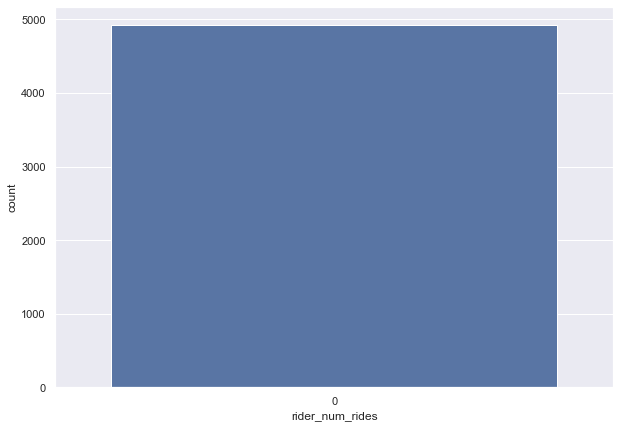

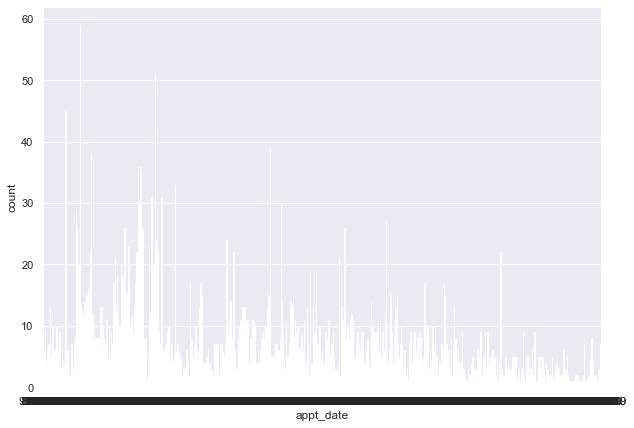

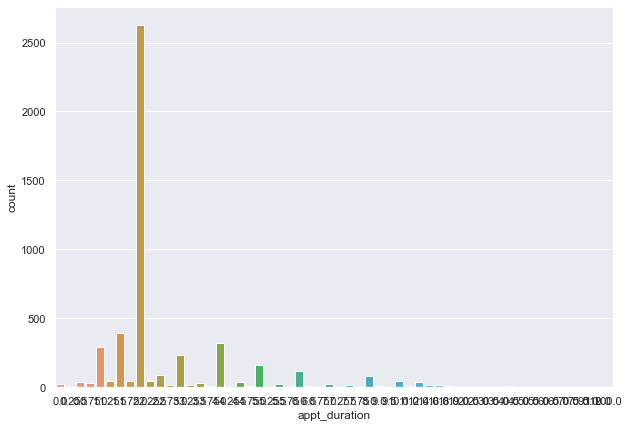

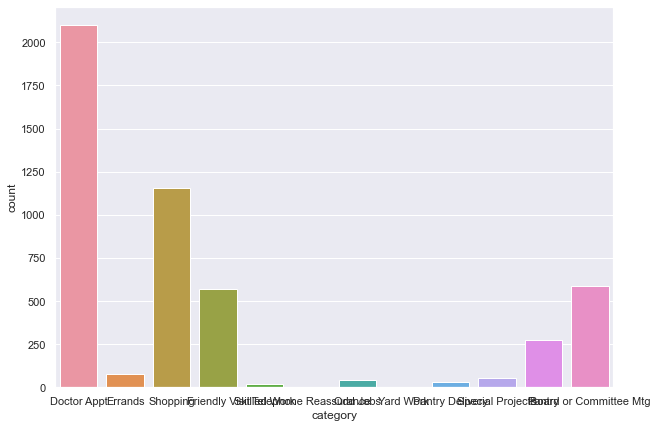

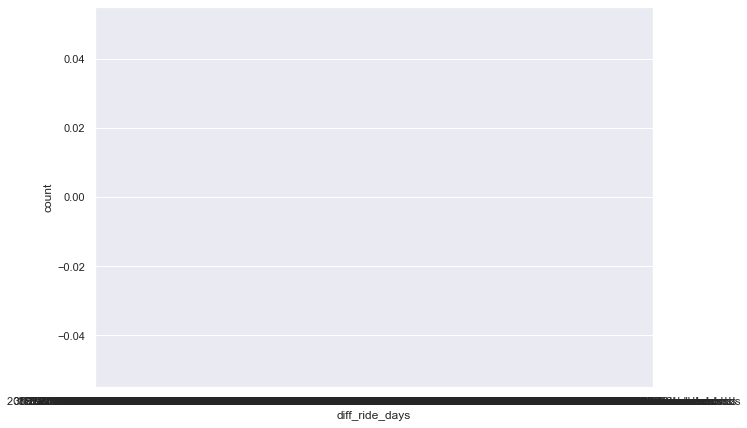

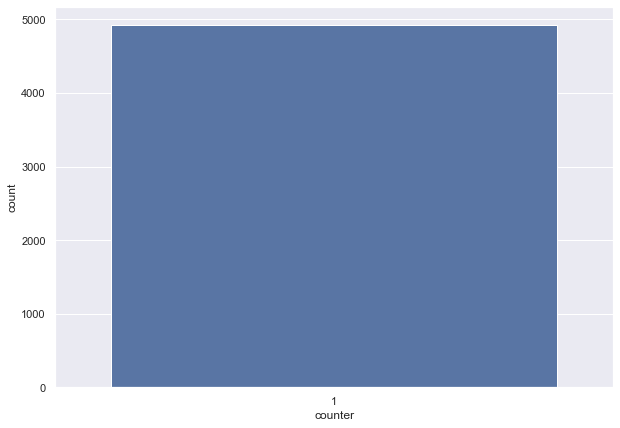

In [115]:
count_plots(volunteer_services_data)

In [116]:
pantry_data.columns

Index(['assistance_date', 'assistance_category', 'amount', 'unit', 'counter'], dtype='object')

assistance_category
Food Pantry: Easter Outreach         AxesSubplot(0.125,0.125;0.775x0.755)
Food Pantry: Food Pantry Poundage    AxesSubplot(0.125,0.125;0.775x0.755)
Food Pantry: Holiday Baskets         AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

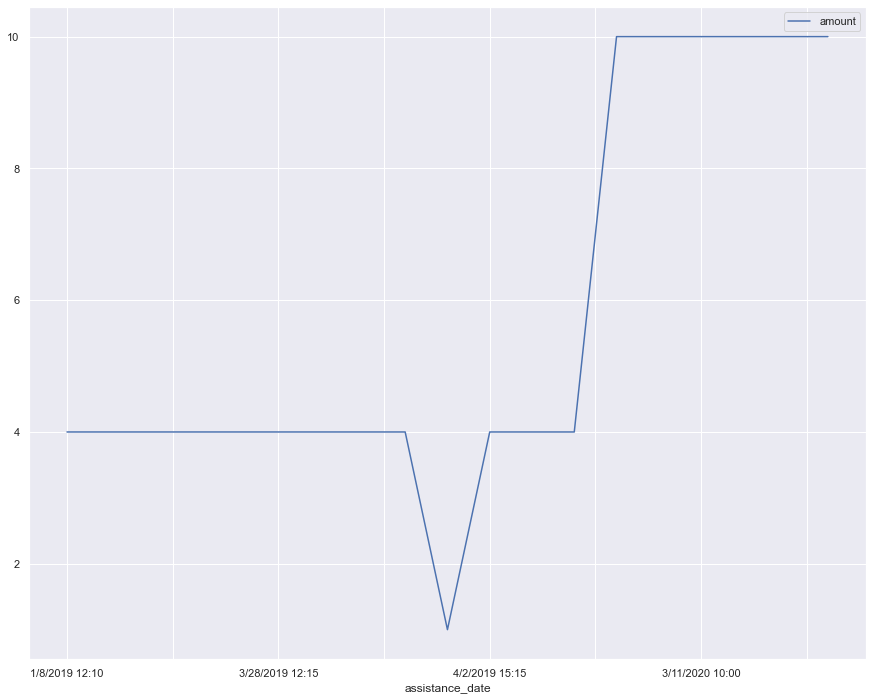

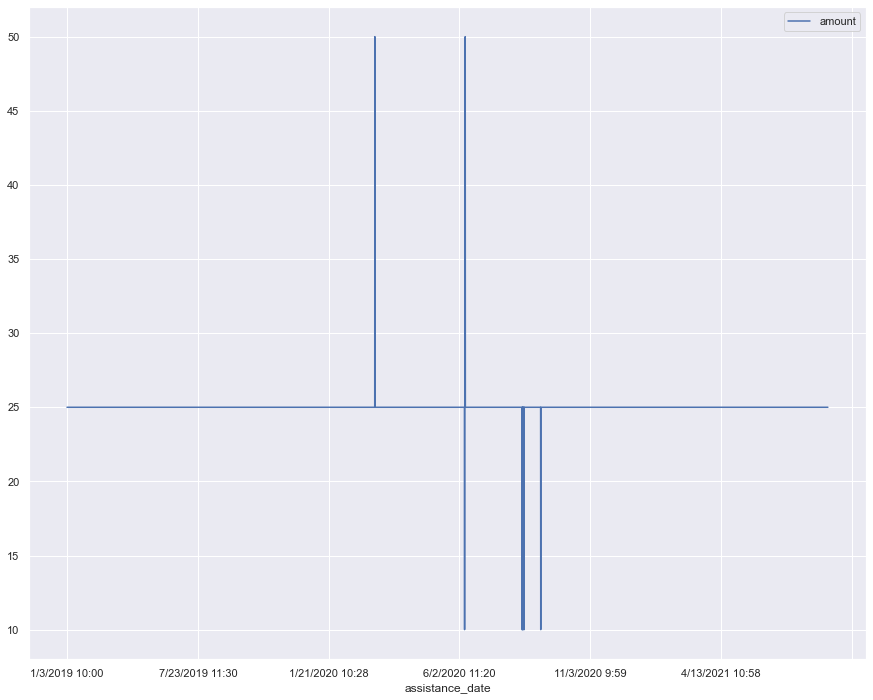

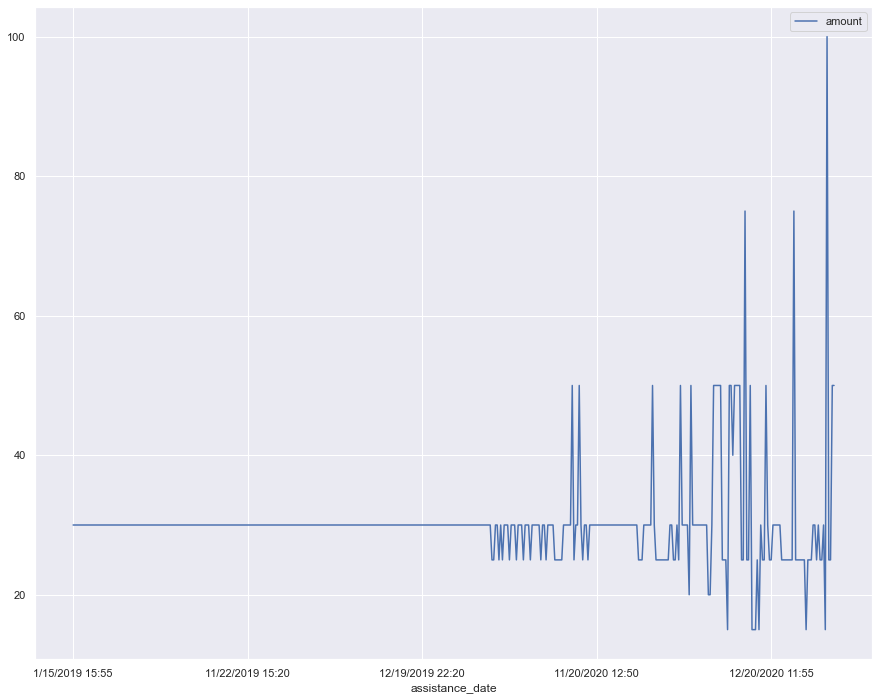

In [117]:
pantry_data.groupby('assistance_category').plot(x = 'assistance_date', y = 'amount')

{'whiskers': [<matplotlib.lines.Line2D at 0x1f7469447f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f746953f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f7469537f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f746943520>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f7469437f0>],
 'means': []}

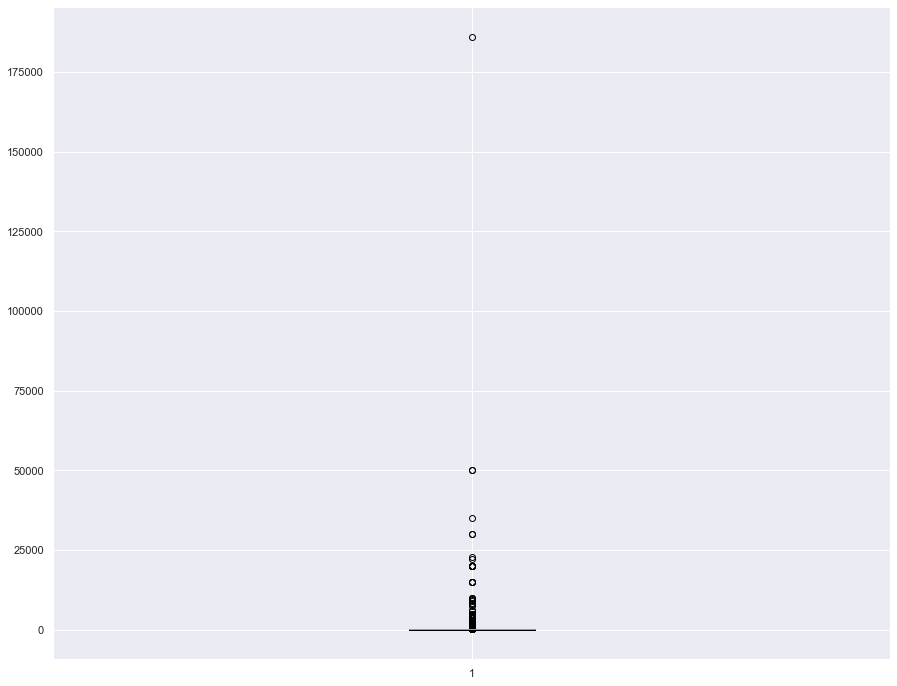

In [118]:
plt.boxplot(donations_data.amount)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f745d018b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f745d01e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f745d015e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f745cfe430>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f745cfe700>],
 'means': []}

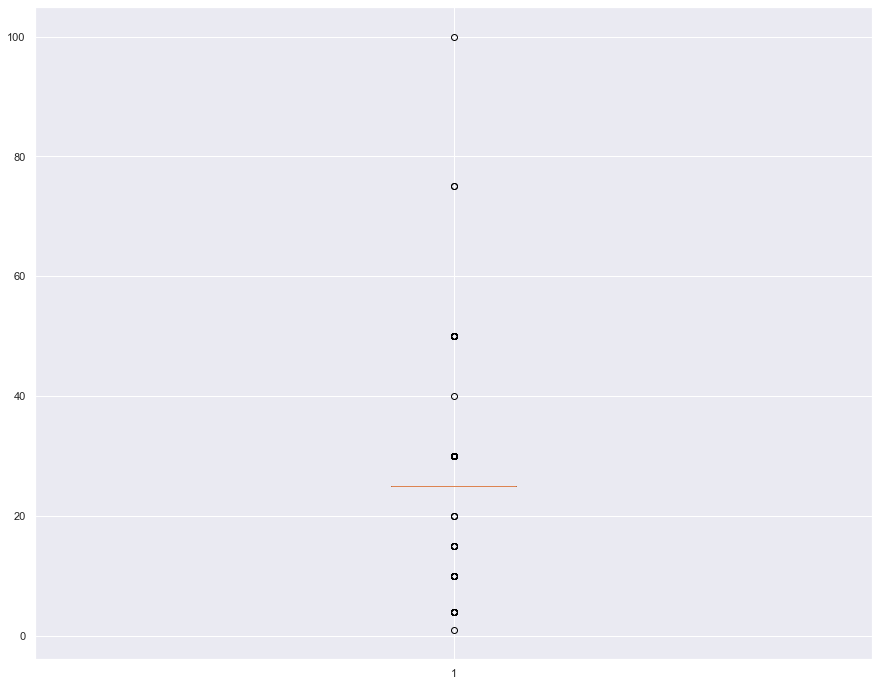

In [119]:
plt.boxplot(pantry_data.amount)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f78a2da8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f78a2dae80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f78a2da610>],
 'medians': [<matplotlib.lines.Line2D at 0x1f78a2e8460>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f78a2e8760>],
 'means': []}

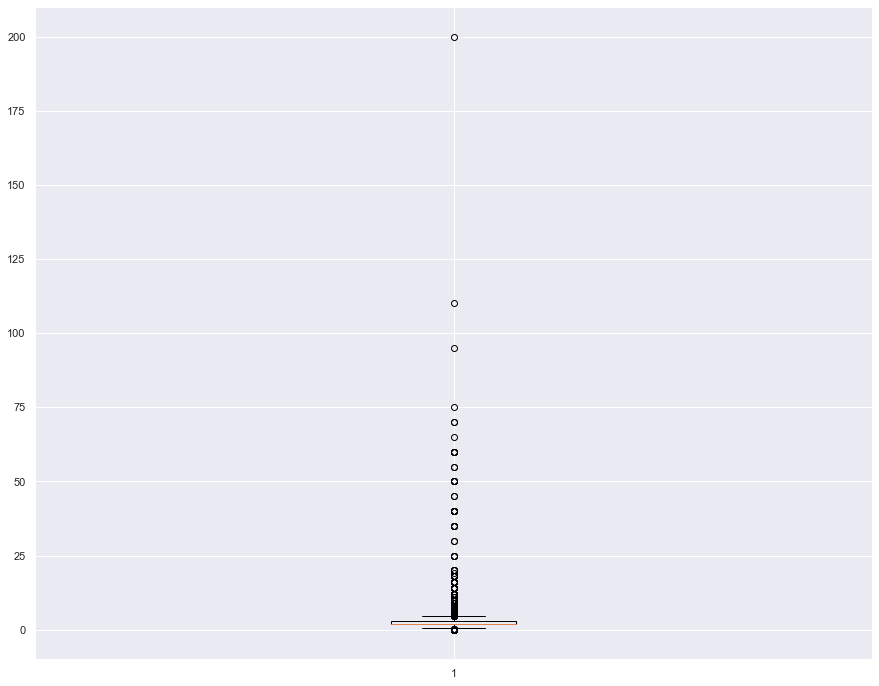

In [120]:
plt.boxplot(volunteer_services_data.appt_duration)

In [121]:
volunteer_services_data.describe()

,rider_num_rides,appt_duration,diff_ride_days,counter
count,4925.0,4925.000000,4925,4925.0
mean,0.0,3.165279,1762 days 05:56:42.639593920,1.0
std,0.0,5.648763,677 days 19:48:39.272689768,0.0
min,0.0,0.000000,0 days 00:00:00,1.0
25%,0.0,2.000000,1309 days 00:00:00,1.0
50%,0.0,2.000000,2100 days 00:00:00,1.0
75%,0.0,3.000000,2313 days 00:00:00,1.0
max,0.0,200.000000,2425 days 00:00:00,1.0


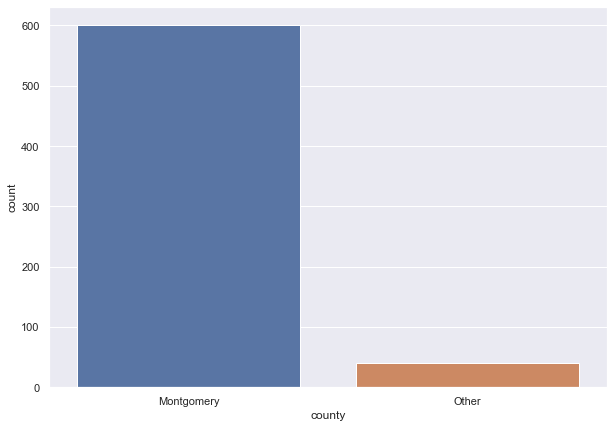

In [122]:
import seaborn as sns
#units_df_min
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot

sns.set_theme(style="darkgrid")
ax = sns.countplot(x="county", data=client_info_data)
# Show Plot
plt.show()

In [133]:
na_df = pd.DataFrame(dataTrain.isna().sum())

NameError: name 'dataTrain' is not defined

In [134]:
na_df

NameError: name 'na_df' is not defined

In [ ]:
dataTrain.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

In [ ]:
def cat_analyzer(dataframe, variable, target = None):
    print(variable)
    print(pd.DataFrame({
            "COUNT": dataframe[variable].value_counts(),
            "RATIO": dataframe[variable].value_counts() / len(dataframe)}), end="\n\n")

In [ ]:
catCols = [col for col in dataTrain.columns if dataTrain[col].dtype=="O"]
for i in dataTrain:
    if i in catCols:
        cat_analyzer(dataTrain, i)

In [ ]:
dataTrain.columns

In [ ]:
# Figure Size

units_df_min = dataTrain.loc[dataTrain['unit'] == 'Minutes']

#units_df_min
fig = plt.figure(figsize =(15, 12))
 
# Horizontal Bar Plot
plt.bar(units_df_min.assistance_category, units_df_min.amount)
 
# Show Plot
plt.show()

In [ ]:
dataTrain.unit